In [7]:
using Revise
using SSMCMain, SSMCMain.BasicMiCRM

In [8]:
using CairoMakie, ProgressLogging

In [9]:
using Base.Threads; nthreads()

18

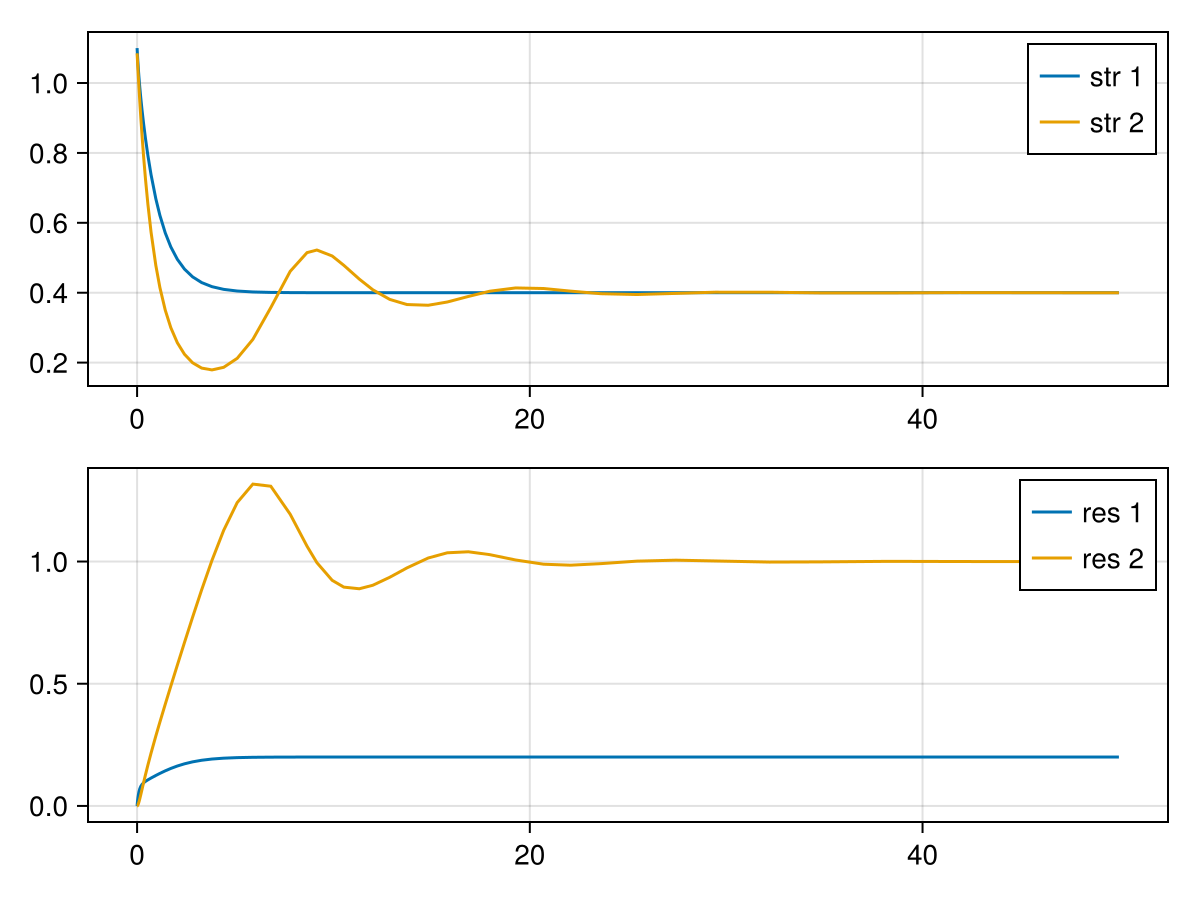

2×2 SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
 10.0  0.0
  0.0  1.0

2×2 SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
 0.0  0.0
 1.0  0.0

Resource 1 iseq is 1.000000
Resource 2 iseq is NaN
┌──────────┬──────────────┬──────────────┬──────────┐
│ Strain i │ ss prod by 1 │ ss prod by 2 │   Upkeep │
├──────────┼──────────────┼──────────────┼──────────┤
│        1 │     5.000000 │          NaN │ 1.000000 │
│        2 │     0.000000 │          NaN │ 1.000000 │
└──────────┴──────────────┴──────────────┴──────────┘


In [10]:
p, s = make_solve_plot_return(2,2,50;
    D=[0. 0.; 1. 0.],
    K=[1., 0.],
    r=[1., 0.],
    l=[0.5, 0.],
    c=[10. 0.; 0. 1.],
    m=[1., 1.],
    u0=[1.,1.,0.,0.],
    u0rand=0.1
)
display(p.p.c)
display(p.p.D)
param_summary(p)

In [11]:
sssol = solve(SteadyStateProblem(p), DynamicSS())

retcode: Success
u: 4-element Vector{Float64}:
 0.4
 0.3999992955709875
 0.2
 1.0000016255130595

maximum(real(lambdas)) = -0.1216127222761178


[ Info: we are getting non-zero imaginary parts, max is 0.600000


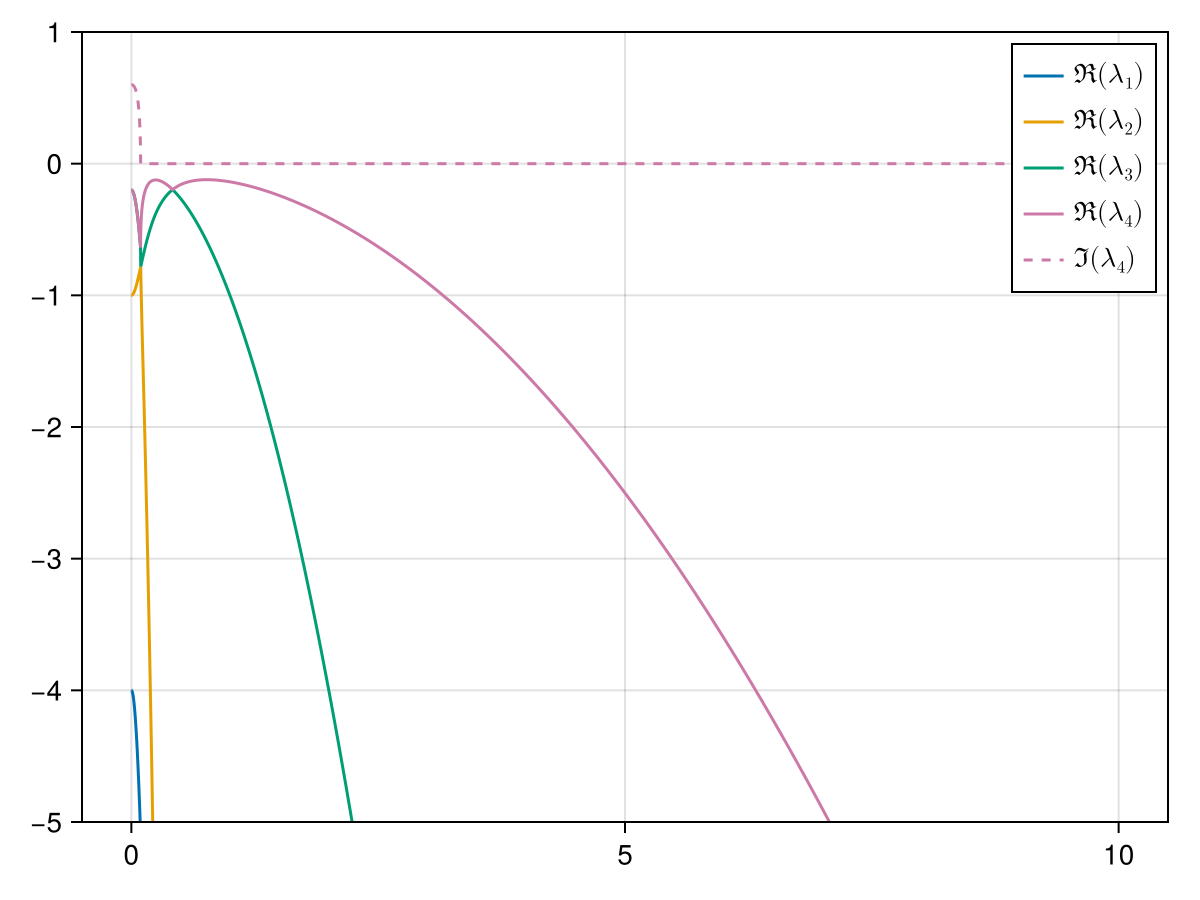

In [12]:
ks = LinRange(0., 10., 10000)
lambdas = do_linstab_for_ks(ks, p, [0.1, 1., 100., 100.], sssol.u);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-5.0, 1.0))
faa